<a href="https://colab.research.google.com/github/Android998/TensorFlow2.3/blob/master/CrearRNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creando nuestra propia RNC**

### **Paso 1: Importar las librerias**

In [148]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [149]:
tf.__version__

'2.3.0'

In [150]:
%matplotlib inline

### **Paso 2: Pre procesado de datos**

#### **Cargar Cifar 10**

In [151]:
#Configurar el nombre de las clases del dataset
calss_names = ["avion", "coche", "pájaro", "gato", "ciervo", "perro", "rana", "caballo", "barco", "camión"]

In [152]:
#Cargar el dataset
[X_train, y_train], [X_test, y_test] = cifar10.load_data()

#### **Normalizar las imagenes**

In [153]:
X_train = X_train/255.0

In [154]:
X_train.shape

(50000, 32, 32, 3)

In [155]:
X_test = X_test/255.0

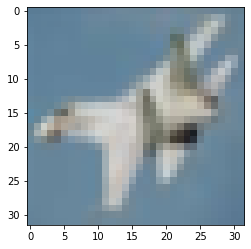

In [156]:
plt.imshow(X_test[10])

In [157]:
y_test[10]

array([0], dtype=uint8)

### **Paso 3: Construir una red neuronal convolucional**

#### **Definir el modelo**

In [158]:
modelo = tf.keras.models.Sequential()

#### **Añadir la primera capa de convolución**
Hyper parametros de la capa de la RNC:
- Filtros: 32
- Tamaño del kerne: 3
- padding: same
- Función de activación: ReLU
- Input_shape: (32, 32, 3)

In [159]:
modelo.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=(32, 32, 3)))

In [160]:
modelo.add(tf.keras.layers.BatchNormalization())

#### **Añadir una segunda capa convolucional y la capa de max-pooling**
Hyper parametros de la capa de la RNC:
- Filtros: 64
- Tamaño del kerne: 3
- padding: same
- Función de activación: ReLU

Hyper parametros de la capa de MaxPool:
- pool_size: 2
- strides: 2
- padding: valid

In [161]:
modelo.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=(32, 32, 3)))
modelo.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="same"))

In [162]:
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.BatchNormalization())

#### **Añadir la tercera capa de convolución**
Hyper parametros de la capa de la RNC:
- Filtros: 32
- Tamaño del kerne: 3
- padding: same
- Función de activación: ReLU
- Input_shape: (32, 32, 3)

In [163]:
modelo.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=(32, 32, 3)))

In [164]:
modelo.add(tf.keras.layers.BatchNormalization())

#### **Añadir una cuarta capa convolucional y la capa de max-pooling**
Hyper parametros de la capa de la RNC:
- Filtros: 64
- Tamaño del kerne: 3
- padding: same
- Función de activación: ReLU

Hyper parametros de la capa de MaxPool:
- pool_size: 2
- strides: 2
- padding: valid

In [165]:
modelo.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=(32, 32, 3)))
modelo.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="same"))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.BatchNormalization())

In [166]:
modelo.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=(32, 32, 3)))
modelo.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="same"))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.BatchNormalization())

#### **Añadir la capa de flattering**

In [167]:
modelo.add(tf.keras.layers.Flatten())

#### **Añadir la primera capa fully connected**
Hyper parametros de la capa totalmente conectada:
- units/neurons:128
- activation: ReLU

In [168]:
modelo.add(tf.keras.layers.Dense(units=128, activation="relu"))

In [169]:
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.BatchNormalization())

In [170]:
modelo.add(tf.keras.layers.Dense(units=256, activation="relu"))

#### **Añadir la capa de salida**

In [171]:
modelo.add(tf.keras.layers.Dense(units=10, activation="softmax"))

In [172]:
modelo.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_27 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 32)       

#### **Compilar el modelo**

In [175]:
my_optim = tf.keras.optimizers.Adam()

In [176]:
modelo.compile(optimizer=my_optim, loss="sparse_categorical_crossentropy", metrics="sparse_categorical_accuracy")

### **Paso 4: Entrenar el modelo**

In [178]:
modelo.fit(X_train, y_train, batch_size=10, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
5000/5000 [==============================] - 23s 5ms/step - loss: 1.4082 - sparse_categorical_accuracy: 0.5018 - val_loss: 0.9778 - val_sparse_categorical_accuracy: 0.6590
Epoch 2/20
5000/5000 [==============================] - 23s 5ms/step - loss: 1.0756 - sparse_categorical_accuracy: 0.6255 - val_loss: 0.9103 - val_sparse_categorical_accuracy: 0.6802
Epoch 3/20
5000/5000 [==============================] - 23s 5ms/step - loss: 0.9817 - sparse_categorical_accuracy: 0.6630 - val_loss: 0.7519 - val_sparse_categorical_accuracy: 0.7369
Epoch 4/20
5000/5000 [==============================] - 24s 5ms/step - loss: 0.9063 - sparse_categorical_accuracy: 0.6883 - val_loss: 0.7033 - val_sparse_categorical_accuracy: 0.7578
Epoch 5/20
5000/5000 [==============================] - 23s 5ms/step - loss: 0.8549 - sparse_categorical_accuracy: 0.7073 - val_loss: 0.7808 - val_sparse_categorical_accuracy: 0.7329
Epoch 6/20
5000/5000 [==============================] - 23s 5ms/step - loss: 0.8058 -

#### **Evaluar el modelo**

In [ ]:
test_loss, test_accuracy = modelo.evaluate(X_test, y_test)

In [ ]:
print("Test accuracy: {}".format(test_accuracy))